## The Sparks Foundation - GRIP
### Task 2: Prediction using Unsupervised ML
#### Author: Harsh Kesasrwani

**Unsupervised Learning**
Unsupervised learning is a fundamental concept in machine learning, where algorithms are tasked with discovering patterns and structures in data without the guidance of labeled examples. This approach empowers the system to identify hidden relationships, group similar data points, and uncover valuable insights, making it a crucial tool in various fields, from clustering customer behavior in marketing to analyzing genetic data for biological research.



**Gaussian Mixture** 
A Gaussian Mixture Model (GMM) is a probabilistic model that represents data as a combination of multiple Gaussian distributions, each characterized by its mean and covariance matrix. GMMs are widely used in clustering and density estimation tasks, as they can capture complex patterns and varying densities within a dataset, making them a versatile tool in unsupervised learning.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

1. IMPORT DATASET

In [6]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('Iris.csv')
df['Species'].loc[101:102]

101    Iris-virginica
102    Iris-virginica
Name: Species, dtype: object

2. DATA PREPROCESSING & DATA ANALYSIS

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
# See how many classes are available totally in dataset
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

#Encode text classes to numeric classes
encoder = LabelEncoder().fit(df['Species'])

In [15]:
# Get hot encoded numeric classes from text classes
hot_encoded_labels = pd.DataFrame(encoder.transform(df['Species']))

In [23]:
# Assign required features to features dataframe
features = df.drop(['Species', 'Id'], axis=1)

features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


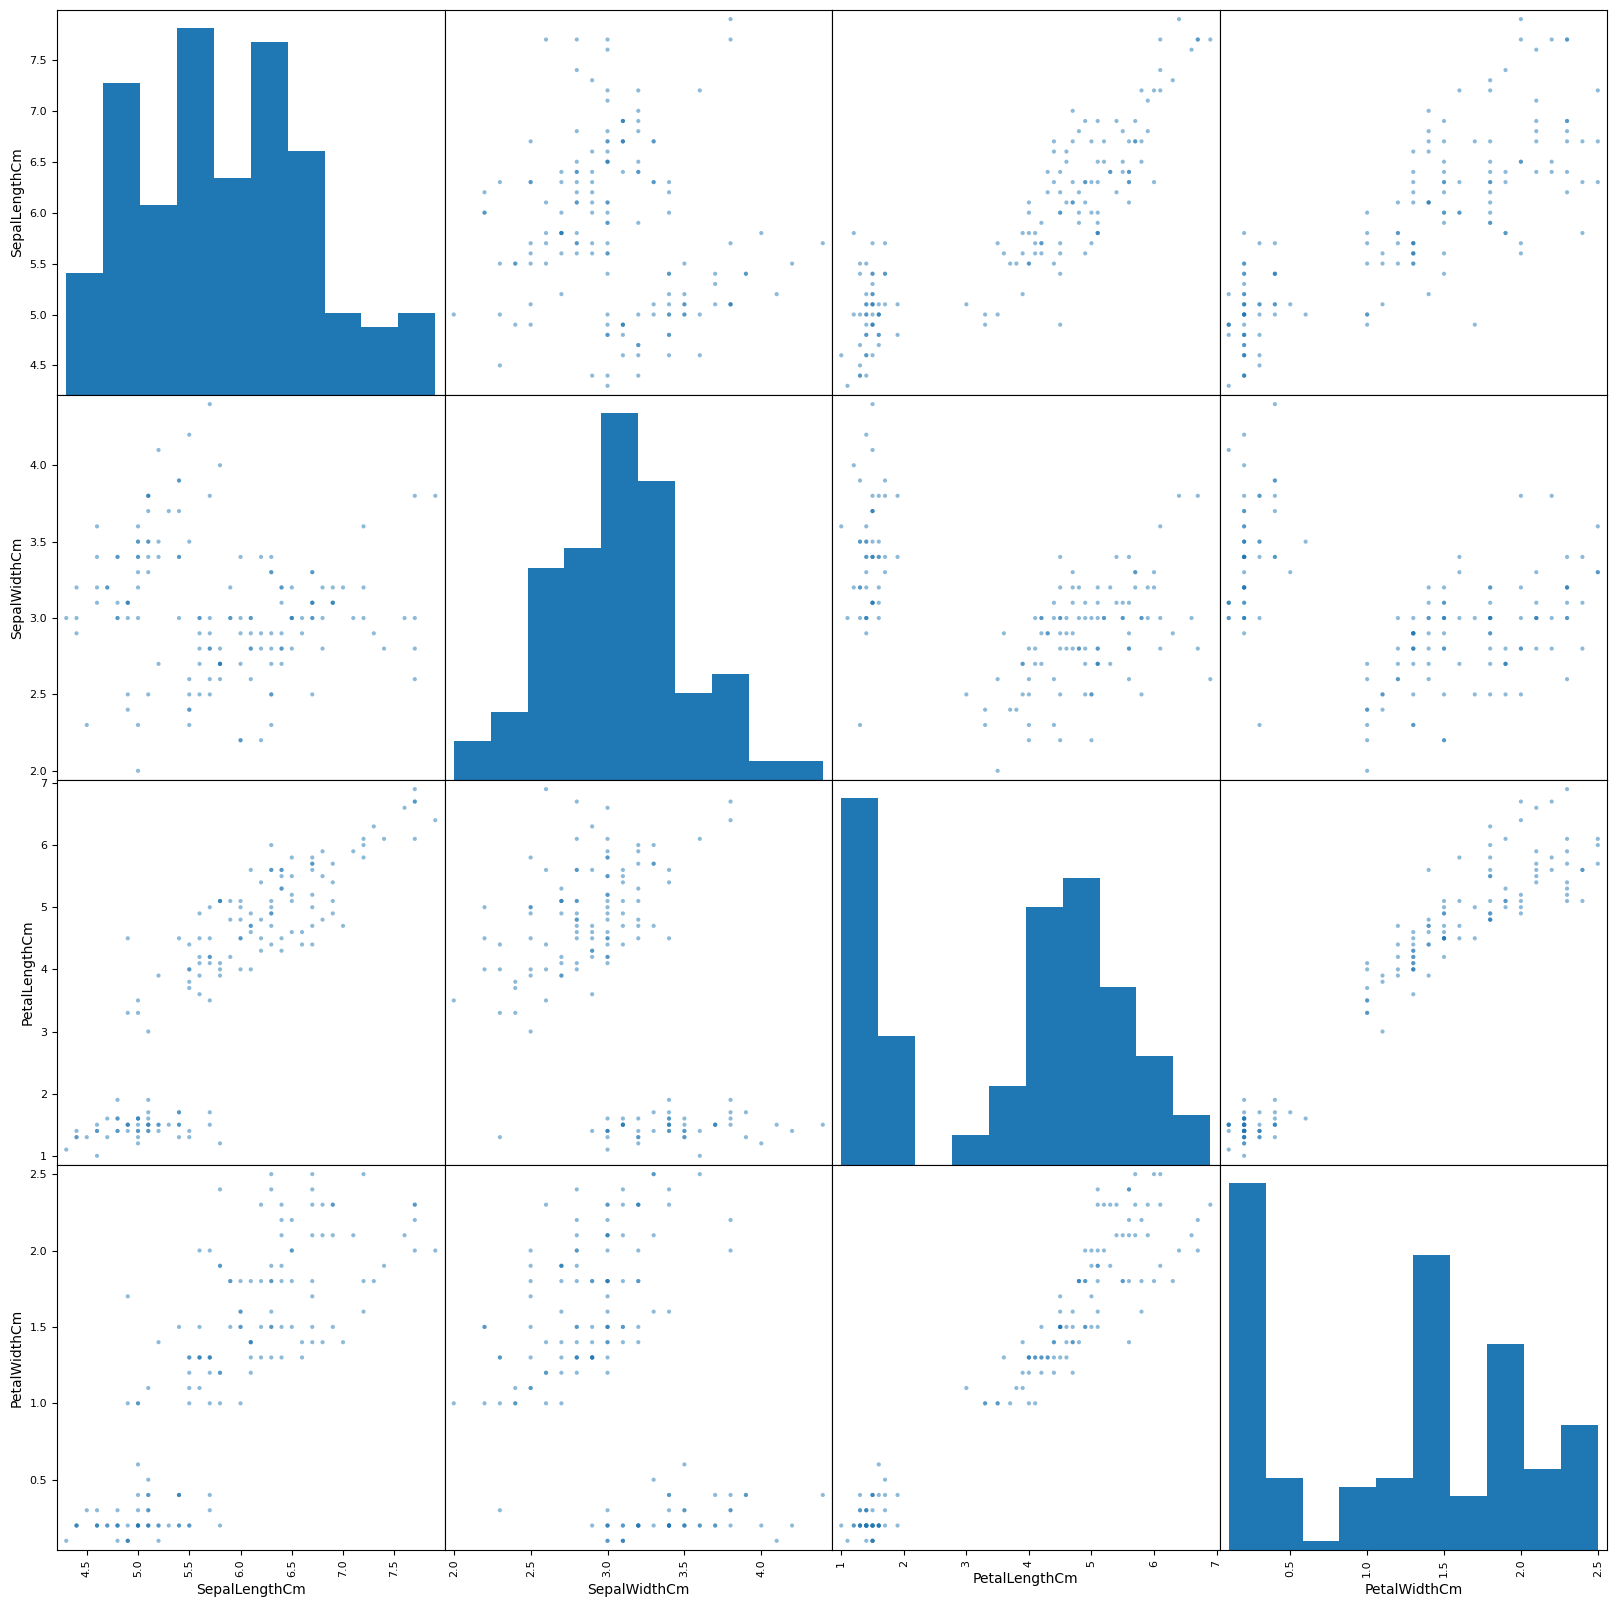

In [18]:
# Draw scatter_matrix to to see relevance of features
pd.plotting.scatter_matrix(features, figsize=(20,20))
x = 1

In [25]:
# Applying unsupervised learning techniques on features
from sklearn.mixture import GaussianMixture

# Create model GaussianMixture
gclf = GaussianMixture(n_components=3, init_params='random')

In [27]:
# Fit the model to the features
gclf.fit(features)

GaussianMixture(init_params='random', n_components=3)

In [29]:
# Predict features i.e.,predict inputs based on formed clusters
gpreds = gclf.predict(features)

In [30]:
def draw_clusters(features, preds):
    fig, axis = plt.subplots(2,2,figsize=(10,8))
    fea_matrix=  [('SepalLengthCm','SepalWidthCm'), ('PetalLengthCm', 'PetalWidthCm'),\
                 ('SepalLengthCm','PetalWidthCm'), ('PetalLengthCm','SepalWidthCm')]

    for i,row in enumerate(axis):
        for j,col in enumerate(row):
            x,y = fea_matrix[i+j]
            col.set_xlabel(x)
            col.set_ylabel(y)
            col.scatter(features[x],features[y], alpha=0.5,  c=preds,cmap='viridis',s=20 )
    plt.show()

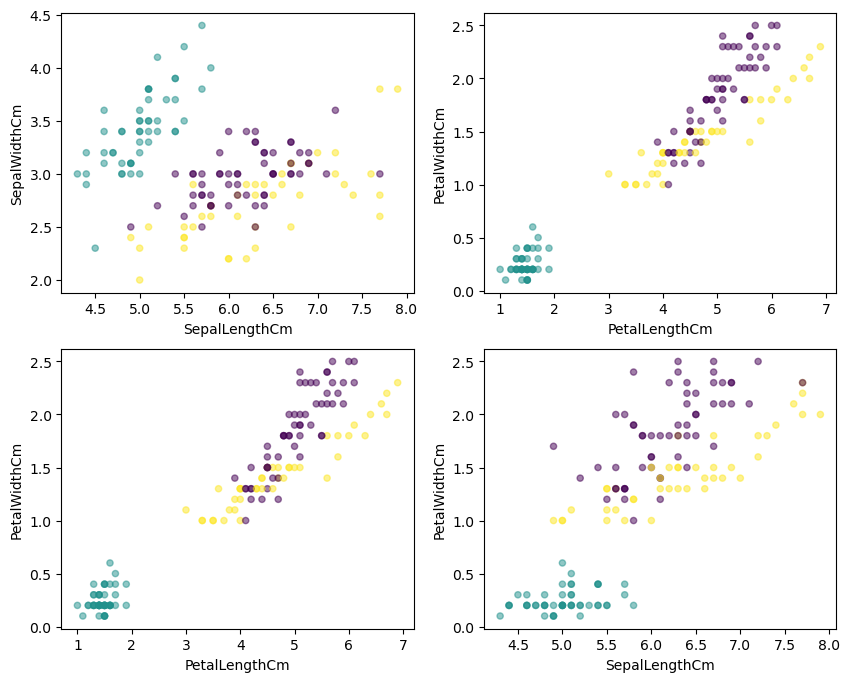

In [31]:
#Clusters formed based on GaussianMixture Model
draw_clusters(features, gpreds)